In [2]:
from keras import layers,Input
from keras.models import Sequential

In [3]:
model=Sequential()

model.add(Input(shape=(150,150,3)))

model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(32,(3,3),activation="relu"))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 32)        0

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator=ImageDataGenerator(rescale=1/255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode="nearest")
validation_generator=ImageDataGenerator(rescale=1/255)

In [7]:
train="catdog/train"
validation="catdog/validation"

In [8]:
train_data_gen=train_generator.flow_from_directory(train,target_size=(150,150),
                                                  batch_size=32,class_mode="binary")
validation_data_gen=validation_generator.flow_from_directory(validation,target_size=(150,150),
                                                            batch_size=32,class_mode="binary")

Found 3499 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [10]:
from tensorflow.keras import optimizers
model.compile(loss="binary_crossentropy",optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=["acc"])

In [11]:
history=model.fit(train_data_gen,validation_data=validation_data_gen,epochs=30)
print("işlem sonlandı")

Epoch 1/30


110/110 [==============================] - 99s 892ms/step - loss: 0.6900 - acc: 0.5216 - val_loss: 0.6802 - val_acc: 0.5180
Epoch 2/30
110/110 [==============================] - 107s 975ms/step - loss: 0.6737 - acc: 0.5702 - val_loss: 0.6565 - val_acc: 0.5960
Epoch 3/30
110/110 [==============================] - 114s 1s/step - loss: 0.6602 - acc: 0.5827 - val_loss: 0.6448 - val_acc: 0.5880
Epoch 4/30
110/110 [==============================] - 101s 917ms/step - loss: 0.6482 - acc: 0.6073 - val_loss: 0.6300 - val_acc: 0.6600
Epoch 5/30
110/110 [==============================] - 101s 917ms/step - loss: 0.6329 - acc: 0.6370 - val_loss: 0.6257 - val_acc: 0.6500
Epoch 6/30
110/110 [==============================] - 101s 918ms/step - loss: 0.6321 - acc: 0.6479 - val_loss: 0.6032 - val_acc: 0.6560
Epoch 7/30
110/110 [==============================] - 84s 757ms/step - loss: 0.6187 - acc: 0.6456 - val_loss: 0.6143 - val_acc: 0.6560
Epoch 8/30
110/110 [==============================]

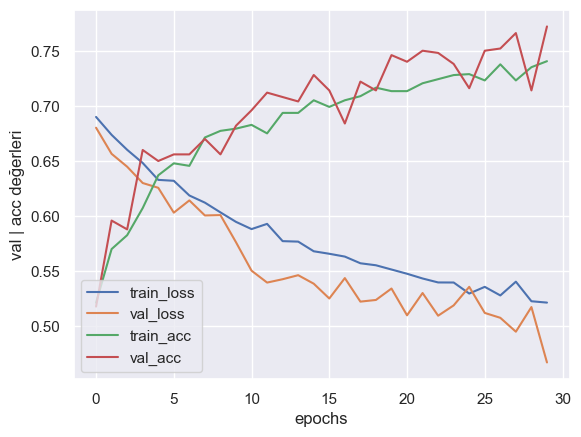

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.plot(history.history["acc"],label="train_acc")
plt.plot(history.history["val_acc"],label="val_acc")

plt.xlabel("epochs")
plt.ylabel("val | acc değerleri")
plt.legend(loc="lower left")
plt.show()


In [13]:
from keras import layers,Input,Model
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.densenet import DenseNet121

In [17]:
model=VGG16(include_top=False,input_shape=(224,224,3))
model1=DenseNet121(include_top=False,input_shape=(224,224,3))

In [18]:
for layer in model.layers:
    layer.trainable=False

In [19]:
flatten_layers=layers.Flatten()(model.output)
fc_layers=layers.Dense(512,activation="relu")(flatten_layers)
output_layer=layers.Dense(1,activation="sigmoid")(fc_layers)

In [20]:
model=Model(inputs=model.inputs,outputs=output_layer)

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [22]:
for layer in model1.layers:
    layer.trainable=False

In [23]:
flatten_layers1=layers.Flatten()(model1.output)
fc_layers1=layers.Dense(512,activation="relu")(flatten_layers1)
output_layer1=layers.Dense(1,activation="sigmoid")(fc_layers1)

In [24]:
model1=Model(inputs=model1.inputs,outputs=output_layer1)

In [25]:
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_3[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

 conv2_block4_0_bn (BatchNo  (None, 56, 56, 160)          640       ['conv2_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block4_0_relu (Activ  (None, 56, 56, 160)          0         ['conv2_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block4_1_conv (Conv2  (None, 56, 56, 128)          20480     ['conv2_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv2_block4_1_bn (BatchNo  (None, 56, 56, 128)          512       ['conv2_block4_1_conv[0][0]'] 
 rmalizati

 rmalization)                                                                                     
                                                                                                  
 conv3_block1_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block1_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block1_concat (Conca  (None, 28, 28, 160)          0         ['pool2_pool[0][0]',          
 tenate)                                                             'conv3_block1_2_conv[0][0]'] 
          

 conv3_block5_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block5_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block5_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block5_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block5_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block5_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block5_concat (Conca  (None, 28, 28, 288)          0         ['conv3_block4_concat[0][0]', 
 tenate)  

                                                                                                  
 conv3_block9_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block9_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block9_2_conv (Conv2  (None, 28, 28, 32)           36864     ['conv3_block9_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_blo

 pool3_pool (AveragePooling  (None, 14, 14, 256)          0         ['pool3_conv[0][0]']          
 2D)                                                                                              
                                                                                                  
 conv4_block1_0_bn (BatchNo  (None, 14, 14, 256)          1024      ['pool3_pool[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_0_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_1_conv (Conv2  (None, 14, 14, 128)          32768     ['conv4_block1_0_relu[0][0]'] 
 D)       

                                                                                                  
 conv4_block4_concat (Conca  (None, 14, 14, 384)          0         ['conv4_block3_concat[0][0]', 
 tenate)                                                             'conv4_block4_2_conv[0][0]'] 
                                                                                                  
 conv4_block5_0_bn (BatchNo  (None, 14, 14, 384)          1536      ['conv4_block4_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_0_relu (Activ  (None, 14, 14, 384)          0         ['conv4_block5_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block8_concat (Conca  (None, 14, 14, 512)          0         ['conv4_block7_concat[0][0]', 
 tenate)                                                             'conv4_block8_2_conv[0][0]'] 
                                                                                                  
 conv4_block9_0_bn (BatchNo  (None, 14, 14, 512)          2048      ['conv4_block8_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_0_relu (Activ  (None, 14, 14, 512)          0         ['conv4_block9_0_bn[0][0]']   
 ation)                                                                                           
          

 conv4_block12_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block12_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block12_concat (Conc  (None, 14, 14, 640)          0         ['conv4_block11_concat[0][0]',
 atenate)                                                            'conv4_block12_2_conv[0][0]']
                                                                                                  
 conv4_block13_0_bn (BatchN  (None, 14, 14, 640)          2560      ['conv4_block12_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block13_0_relu (Acti  (None, 14, 14, 640)          0         ['conv4_block13_0_bn[0][0]']  
 vation)  

                                                                                                  
 conv4_block16_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block16_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_concat (Conc  (None, 14, 14, 768)          0         ['conv4_block15_concat[0][0]',
 atenate)                                                            'conv4_block16_2_conv[0][0]']
                                                                                                  
 conv4_block17_0_bn (BatchN  (None, 14, 14, 768)          3072      ['conv4_block16_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block20_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block20_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block20_concat (Conc  (None, 14, 14, 896)          0         ['conv4_block19_concat[0][0]',
 atenate)                                                            'conv4_block20_2_conv[0][0]']
                                                                                                  
 conv4_block21_0_bn (BatchN  (None, 14, 14, 896)          3584      ['conv4_block20_concat[0][0]']
 ormalization)                                                                                    
          

 conv4_block24_1_relu (Acti  (None, 14, 14, 128)          0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 14, 14, 32)           36864     ['conv4_block24_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block24_concat (Conc  (None, 14, 14, 1024)         0         ['conv4_block23_concat[0][0]',
 atenate)                                                            'conv4_block24_2_conv[0][0]']
                                                                                                  
 pool4_bn (BatchNormalizati  (None, 14, 14, 1024)         4096      ['conv4_block24_concat[0][0]']
 on)      

 rmalization)                                                                                     
                                                                                                  
 conv5_block4_0_relu (Activ  (None, 7, 7, 608)            0         ['conv5_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block4_1_conv (Conv2  (None, 7, 7, 128)            77824     ['conv5_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block4_1_bn (BatchNo  (None, 7, 7, 128)            512       ['conv5_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
          

 conv5_block8_0_bn (BatchNo  (None, 7, 7, 736)            2944      ['conv5_block7_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block8_0_relu (Activ  (None, 7, 7, 736)            0         ['conv5_block8_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block8_1_conv (Conv2  (None, 7, 7, 128)            94208     ['conv5_block8_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block8_1_bn (BatchNo  (None, 7, 7, 128)            512       ['conv5_block8_1_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv5_block12_0_bn (BatchN  (None, 7, 7, 864)            3456      ['conv5_block11_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block12_0_relu (Acti  (None, 7, 7, 864)            0         ['conv5_block12_0_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block12_1_conv (Conv  (None, 7, 7, 128)            110592    ['conv5_block12_0_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_blo

 atenate)                                                            'conv5_block15_2_conv[0][0]']
                                                                                                  
 conv5_block16_0_bn (BatchN  (None, 7, 7, 992)            3968      ['conv5_block15_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block16_0_relu (Acti  (None, 7, 7, 992)            0         ['conv5_block16_0_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block16_1_conv (Conv  (None, 7, 7, 128)            126976    ['conv5_block16_0_relu[0][0]']
 2D)                                                                                              
          

In [27]:
from tensorflow.keras import optimizers
model.compile(loss="binary_crossentropy",optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=["acc"])

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator=ImageDataGenerator(rescale=1/255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode="nearest")
validation_generator=ImageDataGenerator(rescale=1/255)

In [29]:
train="catdog/train"
validation="catdog/validation"

In [30]:
train_data_gen=train_generator.flow_from_directory(train,target_size=(224,224),
                                                  batch_size=32,class_mode="binary")
validation_data_gen=validation_generator.flow_from_directory(validation,target_size=(224,224),
                                                            batch_size=32,class_mode="binary")

Found 3499 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [31]:
history1=model.fit(train_data_gen,validation_data=validation_data_gen,epochs=4)
print("işlem sonlandı")

Epoch 1/4
110/110 [==============================] - 401s 4s/step - loss: 0.6208 - acc: 0.7125 - val_loss: 0.3699 - val_acc: 0.8360
Epoch 2/4
110/110 [==============================] - 404s 4s/step - loss: 0.4045 - acc: 0.8162 - val_loss: 0.2766 - val_acc: 0.8780
Epoch 3/4
110/110 [==============================] - 400s 4s/step - loss: 0.3573 - acc: 0.8394 - val_loss: 0.2310 - val_acc: 0.8900
Epoch 4/4
110/110 [==============================] - 398s 4s/step - loss: 0.3228 - acc: 0.8597 - val_loss: 0.2712 - val_acc: 0.8700
işlem sonlandı


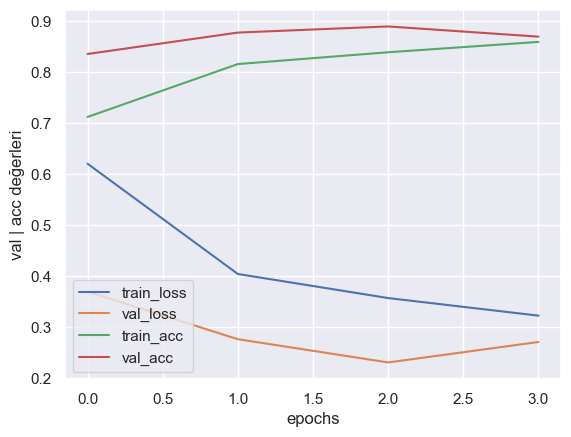

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

plt.plot(history1.history["loss"],label="train_loss")
plt.plot(history1.history["val_loss"],label="val_loss")
plt.plot(history1.history["acc"],label="train_acc")
plt.plot(history1.history["val_acc"],label="val_acc")

plt.xlabel("epochs")
plt.ylabel("val | acc değerleri")
plt.legend(loc="lower left")
plt.show()